In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
df=pd.read_csv("fer2013.csv")
df

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [3]:
def parse_pixels(pixel_string):
    pixels = np.array(pixel_string.split(), dtype='int')
    image = pixels.reshape((48, 48,1))  
    return image
df['image'] = df['pixels'].apply(parse_pixels)

In [4]:
df

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [5]:
images = np.stack(df['image'].values) / 255.0 
df 

,emotion,pixels,Usage,image
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6..."
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1..."
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1..."
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2..."
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],..."
...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3..."
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1..."
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1..."
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6..."


In [6]:
emotion_map = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}
df['emotion_label'] = df['emotion'].map(emotion_map)
df

,emotion,pixels,Usage,image,emotion_label
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6...",Angry
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1...",Angry
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,"[[[231], [212], [156], [164], [174], [138], [1...",Fear
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,"[[[24], [32], [36], [30], [32], [23], [19], [2...",Sad
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],...",Neutral
...,...,...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3...",Neutral
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1...",Happy
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1...",Angry
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest,"[[[30], [28], [28], [29], [31], [30], [42], [6...",Happy


In [7]:
df=df.drop('emotion',axis=1)

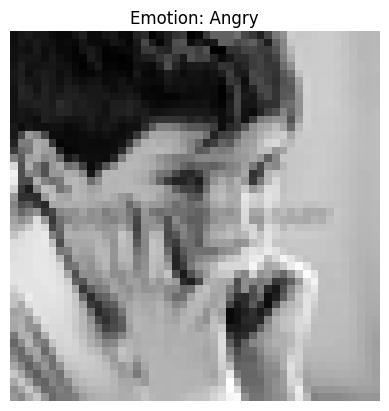

In [14]:
import matplotlib.pyplot as plt
sample_image = df['image'].iloc[3]
plt.imshow(sample_image.reshape(48, 48), cmap='gray')
plt.title(f"Emotion: {df['emotion_label'].iloc[0]}")
plt.axis('off')
plt.show()


In [16]:
df.emotion_label.value_counts()

emotion_label
Happy       8989
Neutral     6198
Sad         6077
Fear        5121
Angry       4953
Surprise    4002
Disgust      547
Name: count, dtype: int64

In [17]:
labels_to_drop = ['Sad', 'Fear', 'Surprise','Disgust']
df = df[~df['emotion_label'].isin(labels_to_drop)]
df

,pixels,Usage,image,emotion_label
0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,"[[[70], [80], [82], [72], [58], [58], [60], [6...",Angry
1,151 150 147 155 148 133 111 140 170 174 182 15...,Training,"[[[151], [150], [147], [155], [148], [133], [1...",Angry
4,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,"[[[4], [0], [0], [0], [0], [0], [0], [0], [0],...",Neutral
7,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training,"[[[77], [78], [79], [79], [78], [75], [60], [5...",Happy
8,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training,"[[[85], [84], [90], [121], [101], [102], [133]...",Happy
...,...,...,...,...
35881,181 177 176 156 178 144 136 132 122 107 131 16...,PrivateTest,"[[[181], [177], [176], [156], [178], [144], [1...",Angry
35882,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest,"[[[50], [36], [17], [22], [23], [29], [33], [3...",Neutral
35883,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest,"[[[178], [174], [172], [173], [181], [188], [1...",Happy
35884,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest,"[[[17], [17], [16], [23], [28], [22], [19], [1...",Angry


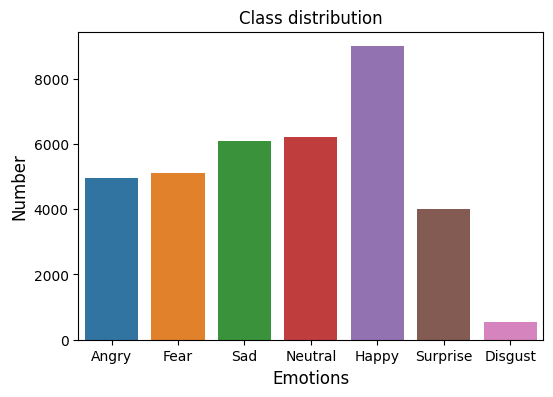

In [ ]:
emotion_counts = df['emotion'].value_counts(sort=False).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_map)
emotion_counts

import seaborn as sns
plt.figure(figsize=(6,4))
sns.barplot(x= emotion_counts.emotion, y = emotion_counts.number)
plt.title('Class distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)
plt.show()

In [18]:
df['emotion_label'] = df['emotion_label'].replace('Neutral', 'Calm')


C:\Users\kshit\AppData\Local\Temp\ipykernel_20036\103728091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['emotion_label'] = df['emotion_label'].replace('Neutral', 'Calm')


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.emotion_label=le.fit_transform(df.emotion_label)

C:\Users\kshit\AppData\Local\Temp\ipykernel_20036\4269509682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.emotion_label=le.fit_transform(df.emotion_label)


In [23]:
df.emotion_label.value_counts()

emotion_label
2    8989
1    6198
0    4953
Name: count, dtype: int64

In [36]:
for i, label in enumerate(le.classes_):
    print(f'Integer: {i}, Label: {label}')


Integer: 0, Label: Angry
Integer: 1, Label: Calm
Integer: 2, Label: Happy


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data = df[df['Usage']=='Training']
test_data = df[df['Usage']=='PublicTest']

train_data_gen = ImageDataGenerator(rescale=1./255)
test_data_gen = ImageDataGenerator(rescale=1./255)


In [26]:
train_generator = train_data_gen.flow(
    x=np.stack(train_data['image'].values),  
    y=pd.get_dummies(train_data['emotion_label']),  
    batch_size=64,
    shuffle=True
)
validation_generator = test_data_gen.flow(
    x=np.stack(test_data['image'].values),
    y=pd.get_dummies(test_data['emotion_label']),
    batch_size=64,
    shuffle=False  
)

print("Training data shape:", train_data.shape)
print("Testing/validation data shape:", test_data.shape)


Training data shape: (16175, 4)
Testing/validation data shape: (1969, 4)


In [31]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten
from keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
import cv2
from keras.models import model_from_json


emotion_model_1 = Sequential() 
  
emotion_model_1.add(Conv2D(32, kernel_size=(3, 3), activation='relu',  
                         input_shape=(48, 48, 1))) 
emotion_model_1.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) 
emotion_model_1.add(MaxPooling2D(pool_size=(2, 2))) 
emotion_model_1.add(Dropout(0.25)) 
  
emotion_model_1.add(Flatten()) 
emotion_model_1.add(Dense(1024, activation='relu')) 
emotion_model_1.add(Dropout(0.5)) 
emotion_model_1.add(Dense(3, activation='softmax')) 
  
emotion_model_1.summary() 
  
cv2.ocl.setUseOpenCL(False) 
initial_learning_rate = 0.0001
lr_schedule = ExponentialDecay(initial_learning_rate, decay_steps=100000,  
                               decay_rate=0.96) 
  
optimizer = Adam(learning_rate=lr_schedule) 
  
emotion_model_1.compile(loss='categorical_crossentropy', optimizer=optimizer,  
                      metrics=['accuracy']) 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 46, 46, 32)        320       
                                                                 
 conv2d_9 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 22, 22, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 10, 10, 128)       0         
 g2D)                                                 

In [33]:
history = emotion_model_1.fit( 
    train_generator, 
    epochs=10,                   # Number of epochs (complete passes through the dataset)
    validation_data=validation_generator, 
)

emotion_model_1.evaluate(validation_generator)

Epoch 1/10
253/253 [==============================] - 35s 140ms/step - loss: 0.9504 - accuracy: 0.5526 - val_loss: 0.8875 - val_accuracy: 0.6084
Epoch 2/10
253/253 [==============================] - 40s 160ms/step - loss: 0.8557 - accuracy: 0.6175 - val_loss: 0.8219 - val_accuracy: 0.6318
Epoch 3/10
253/253 [==============================] - 41s 161ms/step - loss: 0.7893 - accuracy: 0.6532 - val_loss: 0.7542 - val_accuracy: 0.6607
Epoch 4/10
253/253 [==============================] - 41s 162ms/step - loss: 0.7392 - accuracy: 0.6767 - val_loss: 0.7135 - val_accuracy: 0.6907
Epoch 5/10
253/253 [==============================] - 47s 187ms/step - loss: 0.6973 - accuracy: 0.7018 - val_loss: 0.6873 - val_accuracy: 0.7054
Epoch 6/10
253/253 [==============================] - 44s 175ms/step - loss: 0.6707 - accuracy: 0.7110 - val_loss: 0.6591 - val_accuracy: 0.7197
Epoch 7/10
253/253 [==============================] - 45s 177ms/step - loss: 0.6443 - accuracy: 0.7215 - val_loss: 0.6365 - val_ac

[0.5991421937942505, 0.7420009970664978]

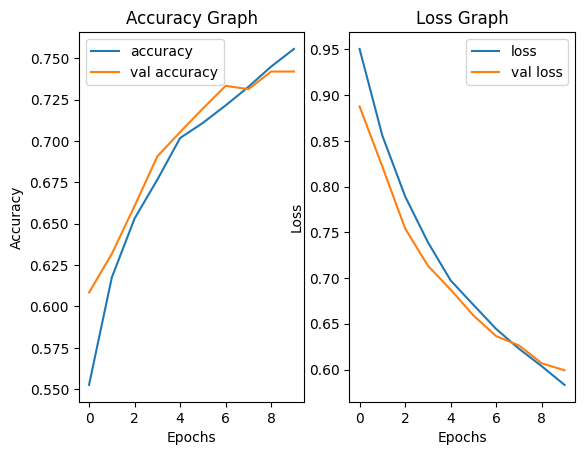

In [34]:
accuracy = history.history['accuracy'] 
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt 

# Accuracy graph 
plt.subplot(1, 2, 1) 
plt.plot(accuracy, label='accuracy') 
plt.plot(val_accuracy, label='val accuracy') 
plt.title('Accuracy Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 

# Loss graph 
plt.subplot(1, 2, 2) 
plt.plot(loss, label='loss') 
plt.plot(val_loss, label='val loss') 
plt.title('Loss Graph') 
plt.xlabel('Epochs') 
plt.ylabel('Loss') 
plt.legend() 

plt.show() 


In [35]:
emotion_model_1.save('emotion_model_modified.h5')


c:\Users\kshit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
